# Introduction to CFG in Scalpel

## What is the control flow graph
The control-flow graph(CFG) construction module generates intra-procedural CFGs, which are an essential component in static flow analysis with applications such as program optimization and taint analysis. A CFG represents all paths that might be traversed through a program during its execution. The CFGs of a Python project can be combined with the call graph to generate an inter-procedural CFG of the project.


## Let's install Scalpel first

```console
python -m pip install .
```

### Import CFGBuilder API

In [1]:
from scalpel.cfg import CFGBuilder

### Let's have an example code.

In [2]:
# let's have an example code 
src= """
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b

fib_gen = fib()
for _ in range(10):
    next(fib_gen)
"""

### The recursive data structure to store all CFG for given source code
Building CFGs for the given source code. Please note that the function returns a dictionary stucture in which CFGs for every function definition will be assigned a CFG. 

In [3]:
# Please note there cfg returned from CFGBuilder().build_from-src is a recursive datastructure
cfg = CFGBuilder().build_from_src("Fib", src)
fun_cfg = cfg.functioncfgs.items()



### A picture is worth a thousand words

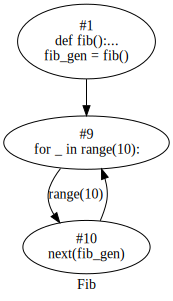

In [4]:
cfg.build_visual('png')

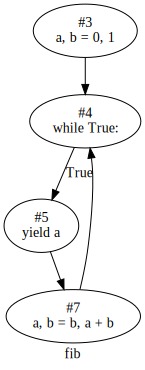

In [5]:
# let's visualize a function cfg 
fib_cfg = None 
for (block_id, fun_name), fun_cfg in cfg.functioncfgs.items():
    if fun_name == "fib":
        fib_cfg = fun_cfg
fib_cfg.build_visual('png')

### Example 2:

In [17]:
src = '''
def bubbleSort(nlist):
    for passnum in range(len(nlist)-1,0,-1):
        for i in range(passnum):
            if nlist[i] > nlist[i+1]:
                temp = nlist[i]
                nlist[i] = nlist[i+1]
                nlist[i+1] = temp

nlist = [3,18,5,11,16]
bubbleSort(nlist)
print(nlist)
'''

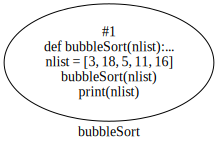

In [18]:
cfgTwo = CFGBuilder().build_from_src("bubbleSort", src)
fun_cfg = cfgTwo.functioncfgs.items()
cfgTwo.build_visual('png')

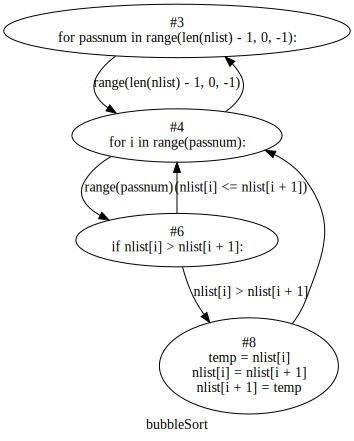

In [22]:
# let's visualize the bubble sort function in cfg
bubbleSort_cfg = None 
for (block_id, fun_name), fun_cfg in cfgTwo.functioncfgs.items():
    if fun_name == "bubbleSort":
        bubbleSort_cfg = fun_cfg
bubbleSort_cfg.build_visual('png')

### Example 3:

In [32]:
src = '''
def triangleType(a,b,c):
    if((a+b) > c) and ((a+c) > b) and ((b+c) > a):
        if a==b and b==c:
            print('Triangle is Equilateral.')
        elif a==b or b==c or a==c:
            print('Triangle is Isosceles.')
        else:
            print('Triangle is Scalane')
    else:
        print('Not a triangle')
    
triangleType(5,5,5)
'''

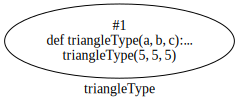

In [33]:
cfgThree = CFGBuilder().build_from_src("triangleType", src)
fun_cfg = cfgThree.functioncfgs.items()
cfgThree.build_visual('png')

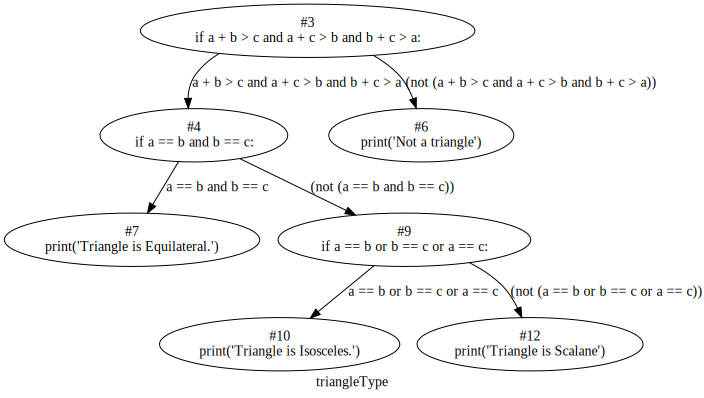

In [34]:
triangle_cfg = None 
for (block_id, fun_name), fun_cfg in cfgThree.functioncfgs.items():
    if fun_name == "triangleType":
        triangle_cfg = fun_cfg
triangle_cfg.build_visual('png')

### Blocks in a CFG: A deep look into CFG 
Let's starting by BFS to get all blocks first

In [6]:
all_blocks = cfg.get_all_blocks()
entry_block = cfg.entryblock

### We can also retreive information from any blocks such as :

1. block id
2. source code of the block
3. a list of statements 

In [7]:
import ast 

entry_block = all_blocks[0]
print(f"block id :{entry_block.id}\n")
print(f"block source\n {entry_block.get_source()}")
print(f"block id :{entry_block.id}")

### 
statements = entry_block.statements
for stmt in statements:
    print(ast.dump(stmt))  # dump this statement as string from the AST node

block id :1

block source
 #1
def fib():...
fib_gen = fib()

block id :1
FunctionDef(name='fib', args=arguments(posonlyargs=[], args=[], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[Assign(targets=[Tuple(elts=[Name(id='a', ctx=Store()), Name(id='b', ctx=Store())], ctx=Store())], value=Tuple(elts=[Constant(value=0), Constant(value=1)], ctx=Load())), While(test=Constant(value=True), body=[Expr(value=Yield(value=Name(id='a', ctx=Load()))), Assign(targets=[Tuple(elts=[Name(id='a', ctx=Store()), Name(id='b', ctx=Store())], ctx=Store())], value=Tuple(elts=[Name(id='b', ctx=Load()), BinOp(left=Name(id='a', ctx=Load()), op=Add(), right=Name(id='b', ctx=Load()))], ctx=Load()))], orelse=[])], decorator_list=[])
Assign(targets=[Name(id='fib_gen', ctx=Store())], value=Call(func=Name(id='fib', ctx=Load()), args=[], keywords=[]))
